# **Exploratory Data Analysis (EDA) of Black Friday Sales**

ABC Private Limited, a retail company, seeks to gain insights into customer purchasing behavior, particularly regarding the purchase amounts across various product categories. The company has provided a dataset summarizing purchases made by diverse customers over the last month, focusing on high-volume products. This dataset includes key information such as customer demographics (age, gender, marital status, city type, and duration of stay in the current city), product details (product ID and product category), and the total purchase amount for the period.

The goal is to develop a predictive model that can estimate the purchase amounts for different customers across products. This model will enable ABC Private Limited to tailor personalized offers for customers, enhancing the relevance and appeal of promotions across product lines.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


# **1. Understanding the Data**

In [2]:
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
duplicate_column_names = df.columns[df.columns.duplicated()].tolist()

if duplicate_column_names:
    print(f"Duplicate column names: {duplicate_column_names}")
else:
    print("No duplicate column names found.")

No duplicate column names found.


In [10]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


# **2. Data Cleaning & Data Transformation**

Text(0.5, 1.0, 'Missing Values')

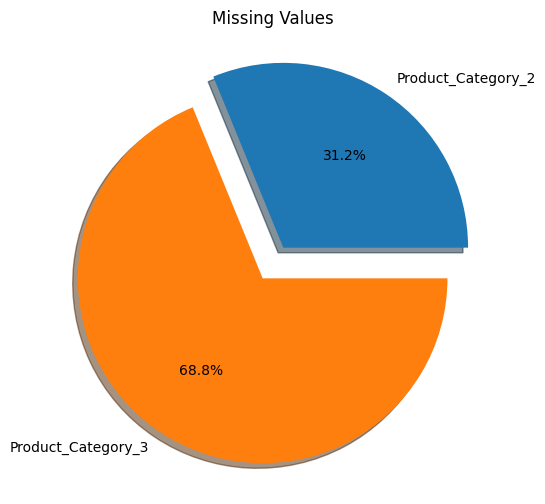

In [11]:
plt.figure(figsize=(10, 6))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Missing Values')

**Product_Category_2**

In [12]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [13]:
df['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [14]:
# NaN Values in Product_Category_2 filled by Median
median_Product_Category_2 = df['Product_Category_2'].median()
df['Product_Category_2'] = df['Product_Category_2'].fillna(median_Product_Category_2)


**Product_Category_3**

In [15]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [16]:
df['Product_Category_3'].describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [17]:
# drop Product_Category_3
df=df.drop('Product_Category_3',axis=1)

In [18]:
df.isna().sum() # NaN Values Handled

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

# **3. Feature Engineering**

Here Added two more columns called 'Long_Term_Resident' and 'Senior_Citizen'

In [19]:
df['Long_Term_Resident'] = df['Stay_In_Current_City_Years'].apply(lambda x: 1 if x == '4+' else 0) # Here added new column called Stay_In_Current_City_Years
df['Senior_Citizen'] = df['Age'].apply(lambda x: 1 if x == '55+' else 0) # Here added new column called Senior_Citizen

In [20]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase', 'Long_Term_Resident',
       'Senior_Citizen'],
      dtype='object')

# **4. Visualization**

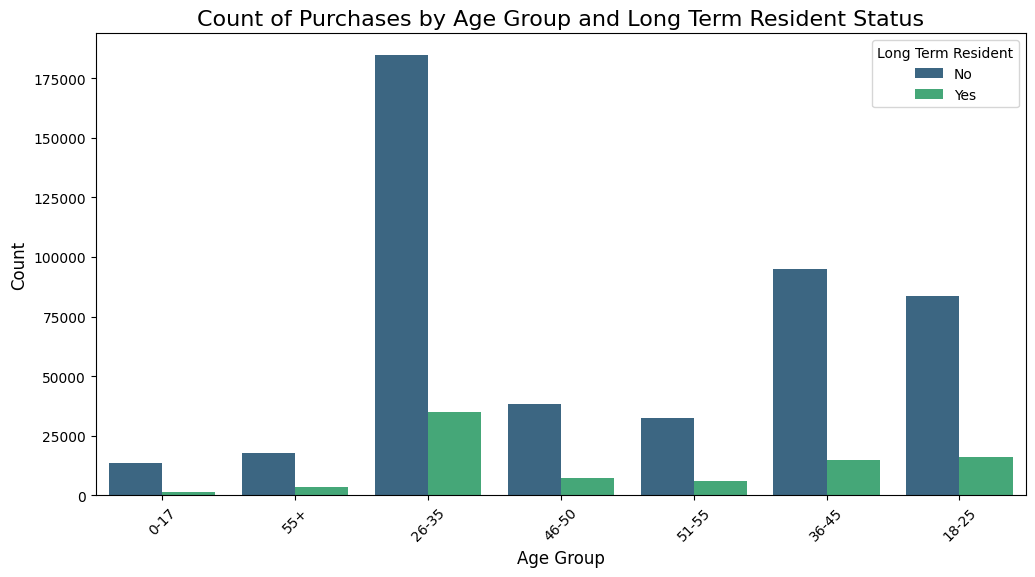

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Long_Term_Resident', palette='viridis')
plt.title('Count of Purchases by Age Group and Long Term Resident Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Long Term Resident', loc='upper right', labels=['No', 'Yes'])
plt.show()

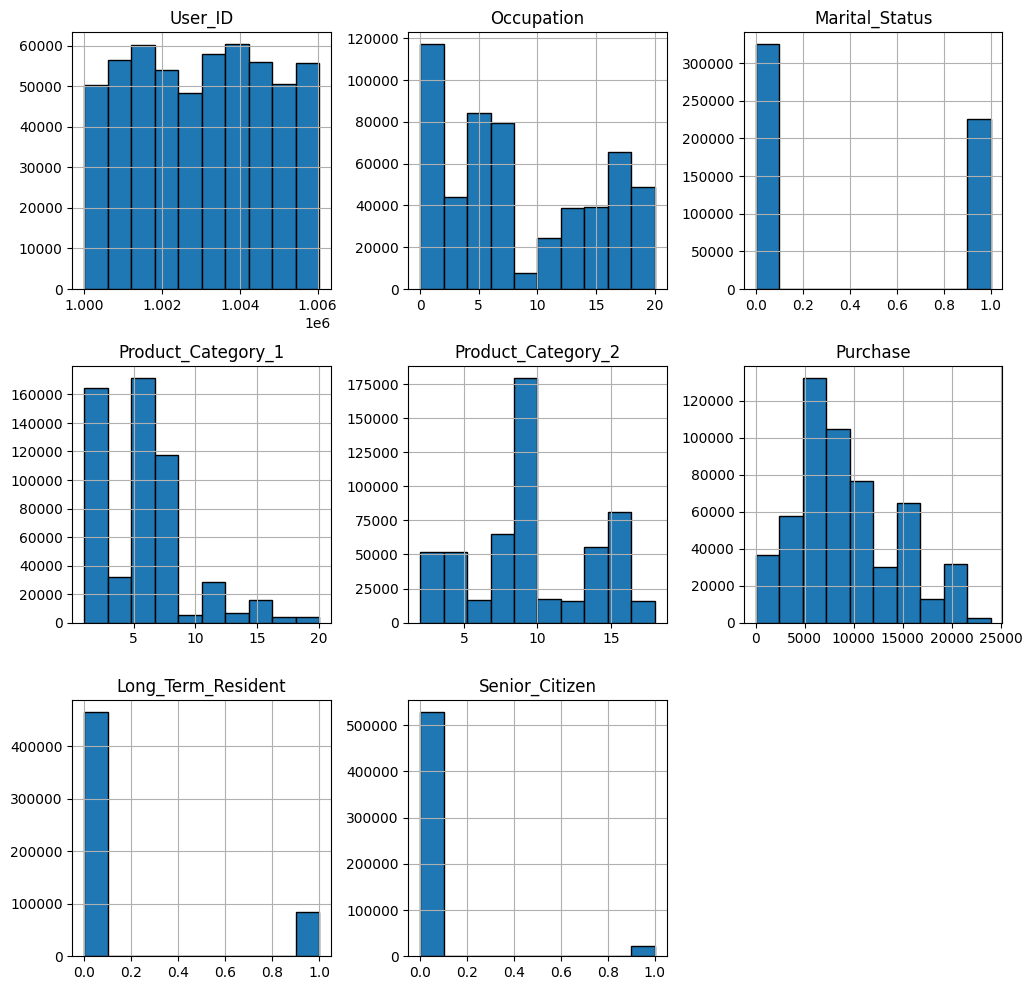

In [22]:
df.hist(edgecolor='black',figsize=(12,12));

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


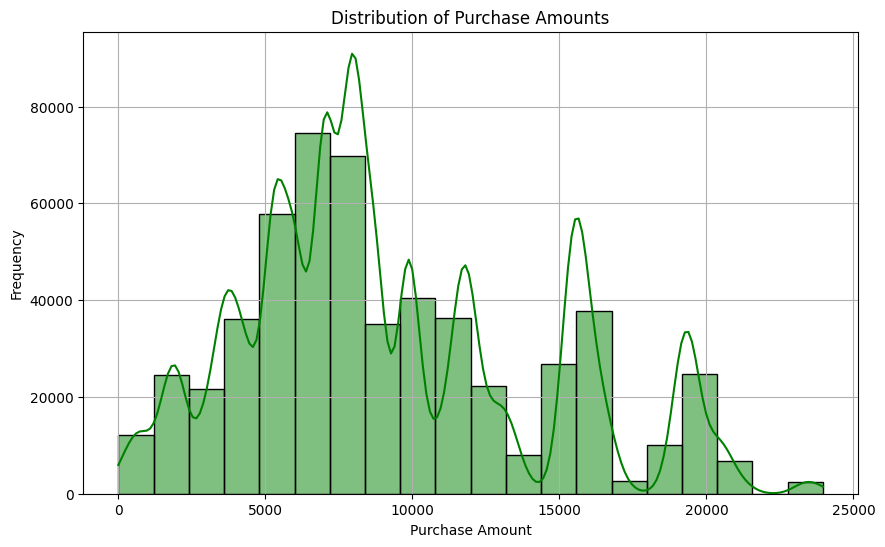

In [23]:
# Now plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["Purchase"], color='g', bins=20, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

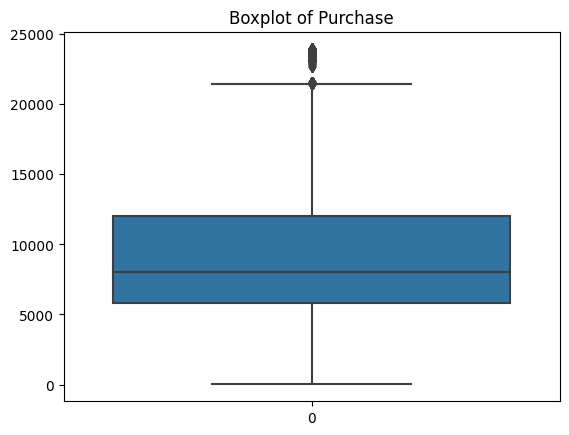

In [24]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

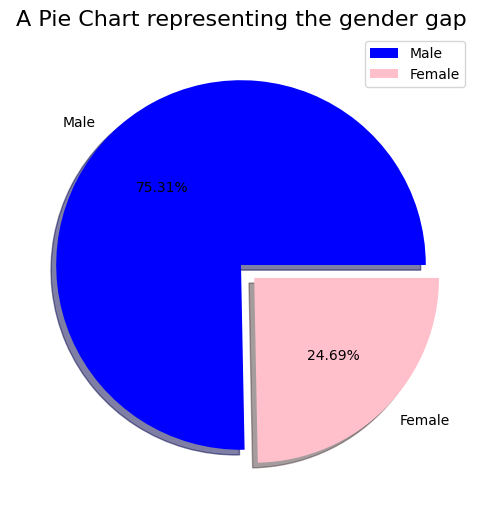

In [25]:
size = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['blue', 'pink']
explode = [0, 0.1]

plt.figure(figsize=(6, 6))
plt.pie(size, colors=colors, labels=labels, shadow=True, explode=explode, autopct='%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize=16)
plt.axis('off')
plt.legend()
plt.show()

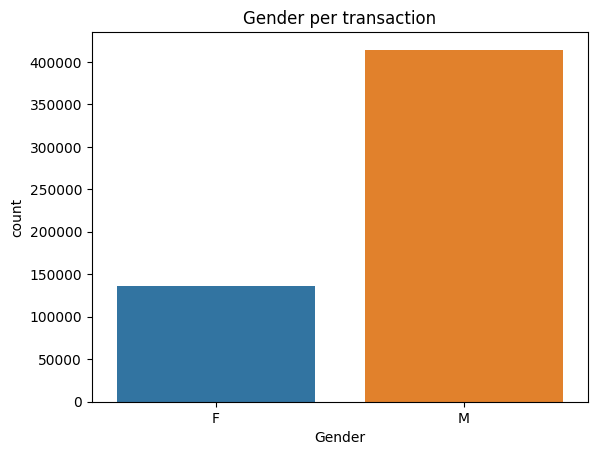

In [26]:
sns.countplot(x=df.Gender)
plt.title('Gender per transaction');

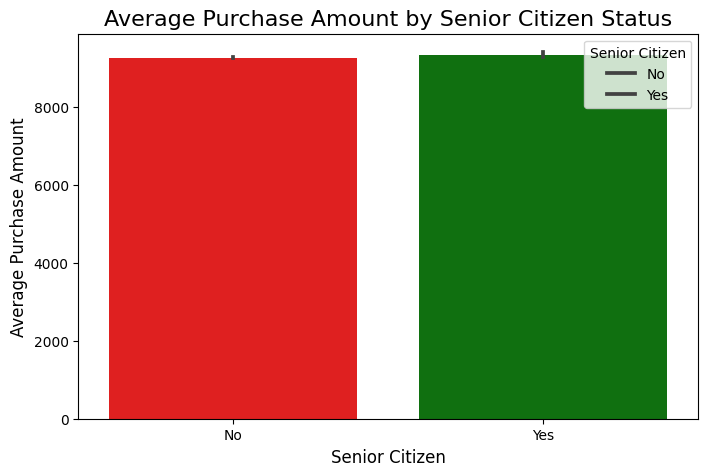

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Senior_Citizen', y='Purchase', hue='Senior_Citizen', palette=['red', 'green'], estimator='mean', dodge=False)
plt.title('Average Purchase Amount by Senior Citizen Status', fontsize=16)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Senior Citizen', loc='upper right', labels=['No', 'Yes'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


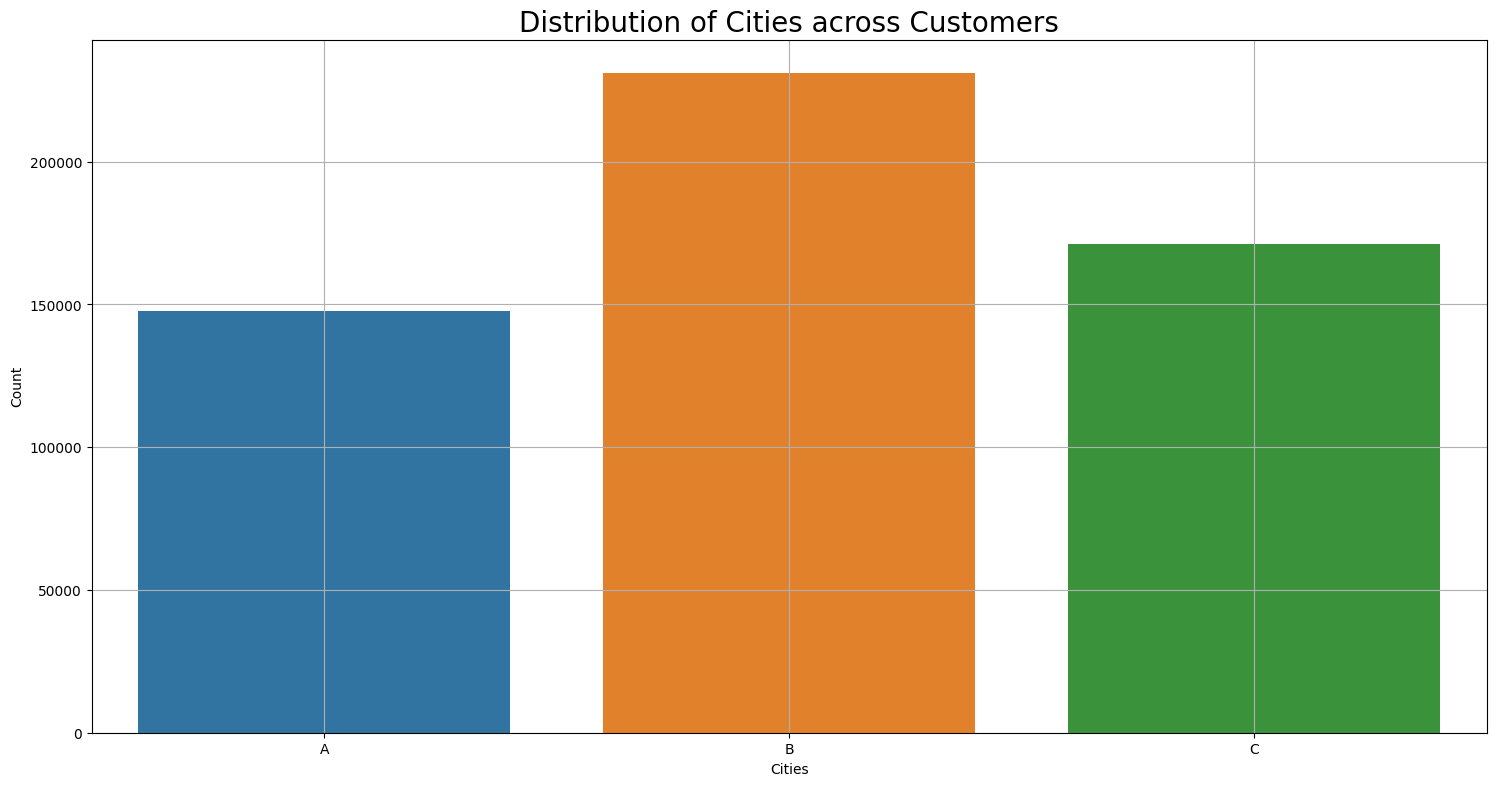

In [28]:
# Convert 'City_Category' to a categorical data type (optional but recommended)
df['City_Category'] = df['City_Category'].astype('category')

# Set figure size
plt.rcParams['figure.figsize'] = (18, 9)

# Create the countplot
sns.countplot(data=df, x='City_Category')
plt.title('Distribution of Cities across Customers', fontsize=20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# **5. Encoding**

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df['Stay_In_Current_City_Years'])
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])

In [30]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Long_Term_Resident,Senior_Citizen
0,1000001,672,0,0,10,0,2,0,3,9.0,8370,0,0
1,1000001,2376,0,0,10,0,2,0,1,6.0,15200,0,0
2,1000001,852,0,0,10,0,2,0,12,9.0,1422,0,0
3,1000001,828,0,0,10,0,2,0,12,14.0,1057,0,0
4,1000002,2734,1,6,16,2,4,0,8,9.0,7969,1,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Long_Term_Resident          550068 non-null  int64  
 12  Senior_Citizen              550068 non-null  int64  
dtypes: float64(1),

# **6. Outlier Detection**

**Boxplot Before Outlier**

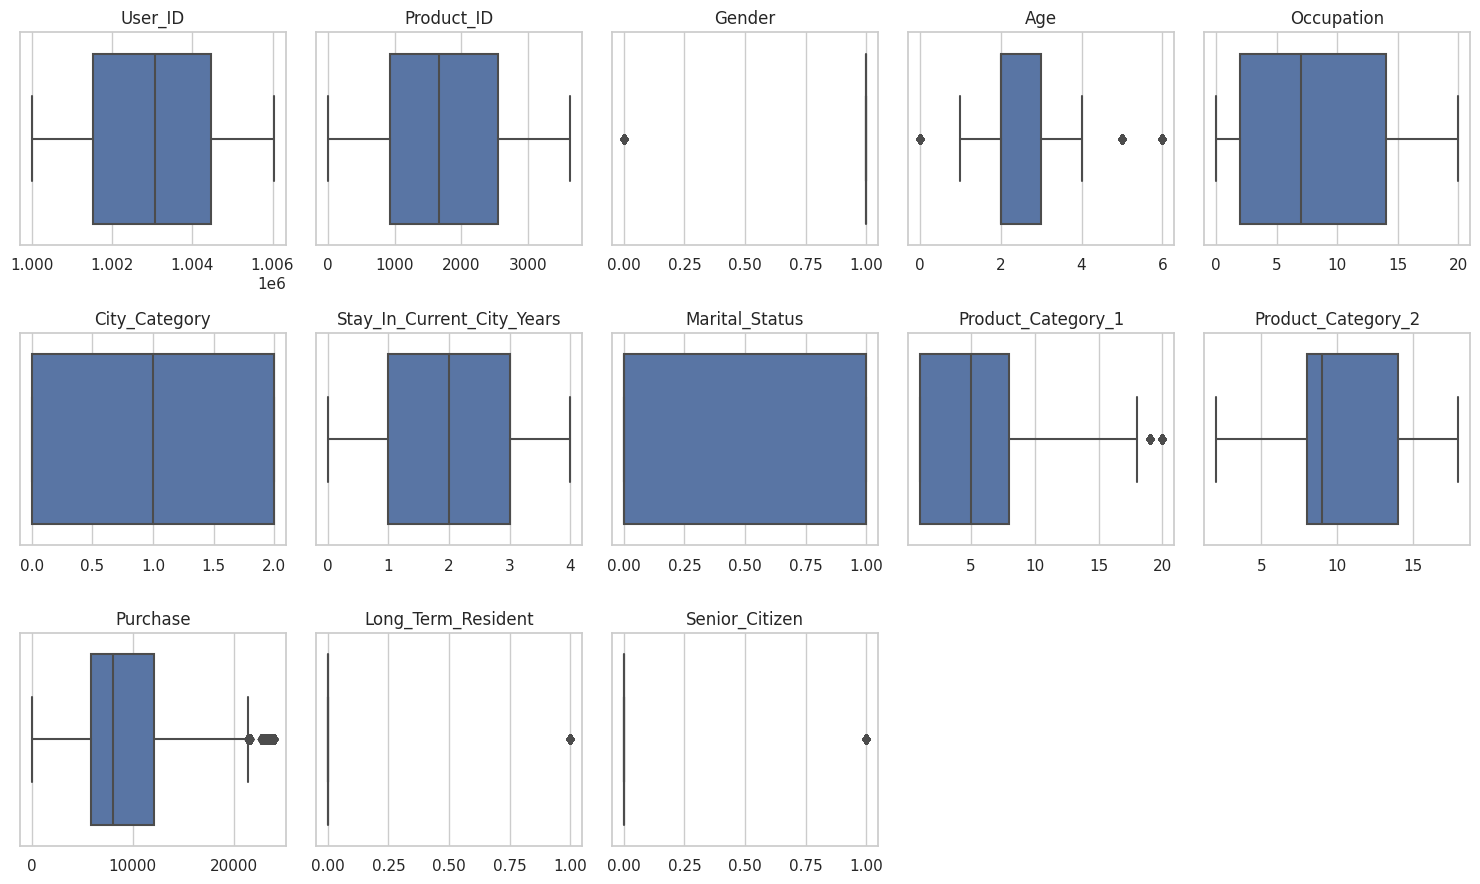

In [32]:
sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [33]:
def handle_outliers_iqr(df, exclude_columns=None, multiplier=1.5):
    if exclude_columns is None:
        exclude_columns = ['Gender', 'Long_Term_Resident','Senior_Citizen']

    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_columns = numerical_columns.drop(exclude_columns, errors='ignore')

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        #print(f"Outliers detected in '{column}': {outliers.index.tolist()}")

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

df = handle_outliers_iqr(df, exclude_columns=['Gender', 'Long_Term_Resident','Senior_Citizen'], multiplier=1.5)

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if column not in ['Gender', 'Long_Term_Resident','Senior_Citizen']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not remaining_outliers.empty:
            print(f"Remaining outliers in '{column}': {remaining_outliers.index.tolist()}")
        else:
            print(f"No remaining outliers in '{column}'.")

No remaining outliers in 'User_ID'.
No remaining outliers in 'Product_ID'.
No remaining outliers in 'Age'.
No remaining outliers in 'Occupation'.
No remaining outliers in 'City_Category'.
No remaining outliers in 'Stay_In_Current_City_Years'.
No remaining outliers in 'Marital_Status'.
No remaining outliers in 'Product_Category_1'.
No remaining outliers in 'Product_Category_2'.
No remaining outliers in 'Purchase'.


**Boxplot After Outlier**

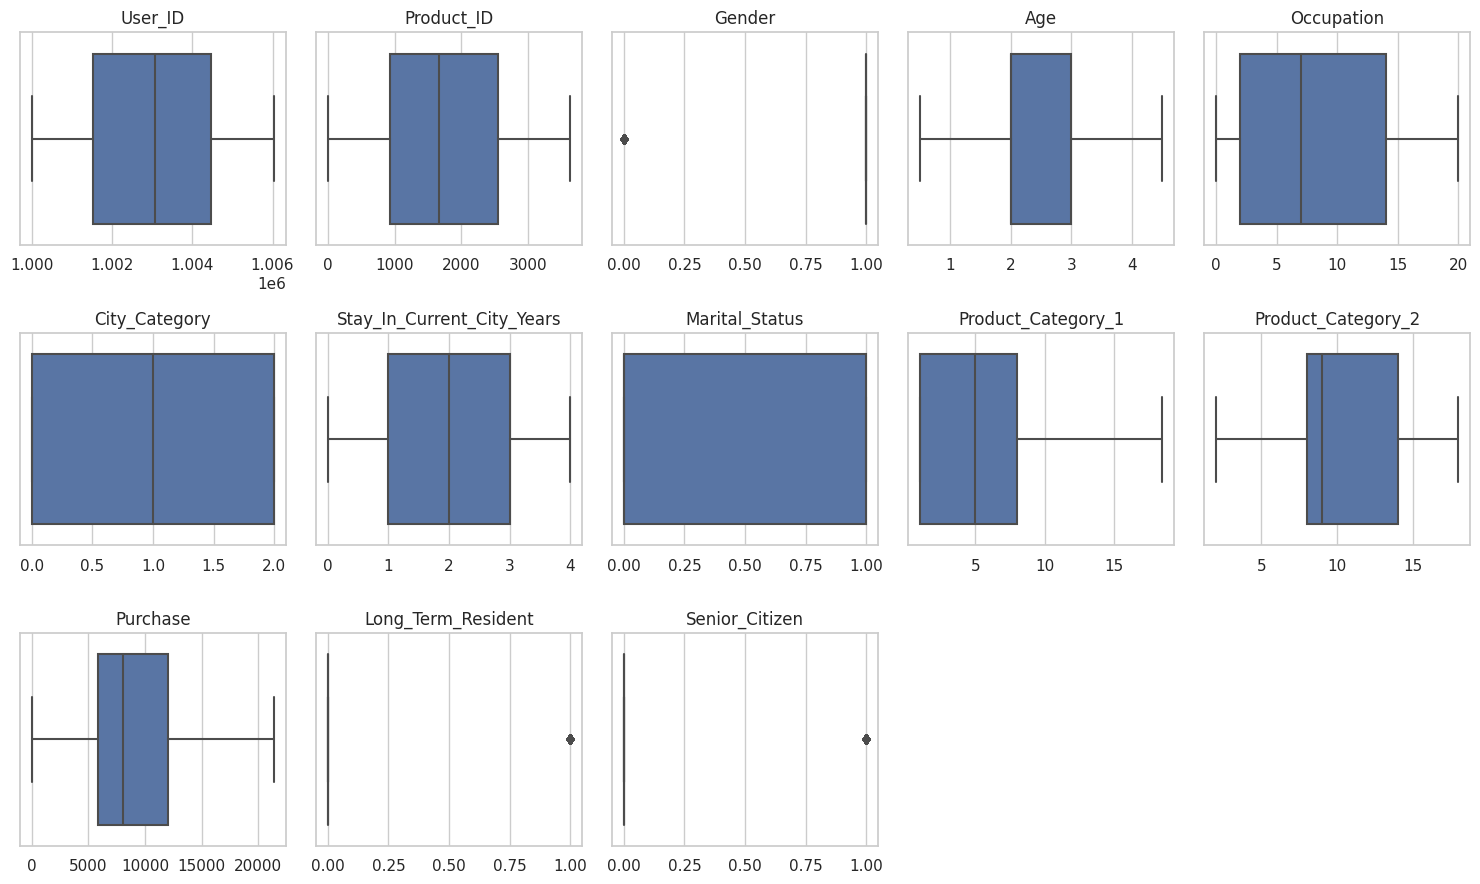

In [34]:
sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

# **7. Scaling**

In [35]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [36]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Long_Term_Resident,Senior_Citizen
0,-1.752639,-1.022993,-1.746513,-1.691616,0.294864,-1.371516,0.109801,-0.833018,-0.613271,-0.136401,-0.177022,-0.426700,-0.201702
1,-1.752639,0.660469,-1.746513,-1.691616,0.294864,-1.371516,0.109801,-0.833018,-1.125214,-0.846289,1.189111,-0.426700,-0.201702
2,-1.752639,-0.845162,-1.746513,-1.691616,0.294864,-1.371516,0.109801,-0.833018,1.690470,-0.136401,-1.566758,-0.426700,-0.201702
3,-1.752639,-0.868873,-1.746513,-1.691616,0.294864,-1.371516,0.109801,-0.833018,1.690470,1.046745,-1.639765,-0.426700,-0.201702
4,-1.752061,1.014154,0.572570,1.838983,1.214734,1.259336,1.660861,-0.833018,0.666585,-0.136401,-0.257230,2.343569,4.957802


# **8. Conclusion**

This Exploratory Data Analysis (EDA) of Black Friday sales data from ABC Private Limited revealed critical insights into customer purchasing behavior. Our analysis of 550,068 entries highlighted significant trends across demographics, particularly regarding age and gender, with older customers and males showing higher average purchase amounts.

Identified and addressed data quality issues, particularly missing values in Product_Category_2, and created additional features such as Long_Term_Resident and Senior_Citizen to refine our understanding of customer segments. Visualizations and outlier detection helped clarify spending patterns and ensure robust data for modeling.

These insights will empower ABC Private Limited to tailor marketing strategies and optimize product offerings, ultimately driving sales growth and enhancing customer satisfaction. This EDA lays the groundwork for a predictive model to further support informed business decisions.

